In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [6]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs=16,validation_split=0.2)

Epoch 1/16
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3467 - accuracy: 0.9017 - val_loss: 0.1364 - val_accuracy: 0.9598
Epoch 2/16
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1222 - accuracy: 0.9632 - val_loss: 0.0919 - val_accuracy: 0.9735
Epoch 3/16
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0956 - val_accuracy: 0.9739
Epoch 4/16
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.0680 - val_accuracy: 0.9801
Epoch 5/16
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.0761 - val_accuracy: 0.9787
Epoch 6/16
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0612 - accuracy: 0.9811 - val_loss: 0.0728 - val_accuracy: 0.9797
Epoch 7/16
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0908 -

In [8]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [9]:
y_pred = y_prob.argmax(axis=1) # giving output of highest probability

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9812

In [12]:
import matplotlib.pyplot as plt

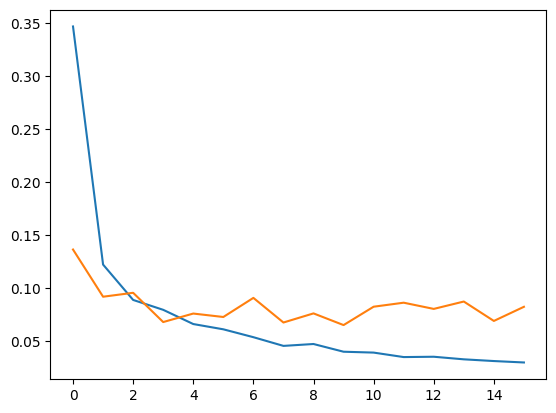

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])